In [50]:
import pandas as pd
import os, sys
import statistics as st
sys.path.insert(0,'../scripts/')

In [72]:
telecom_df = pd.read_csv('../data/telecom_clean_data.csv')
telecom_df.drop("Unnamed: 0",axis=1,inplace=True)

In [52]:
telecom_df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0



Top 10 handsets used by the customers

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: count, dtype: int64

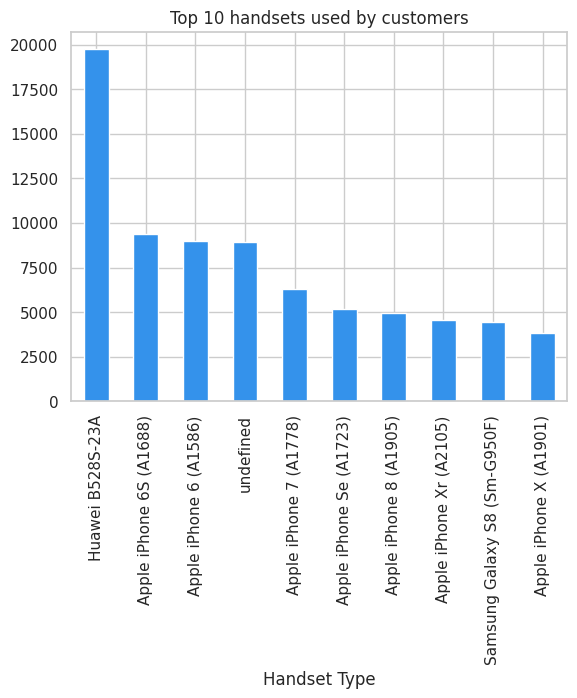

In [53]:
handset_type= telecom_df['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

Top 3 handset manufacturers

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64

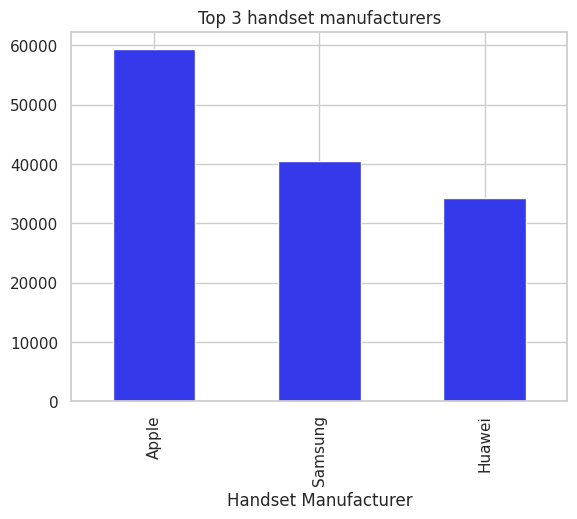

In [54]:
Handset_manufacturers = telecom_df['Handset Manufacturer'].value_counts()[0:3]
Handset_manufacturers.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manufacturers

Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9395
                     Apple iPhone 6 (A1586)    8993
                     Apple iPhone 7 (A1778)    6279
                     Apple iPhone Se (A1723)   5165
                     Apple iPhone 8 (A1905)    4977

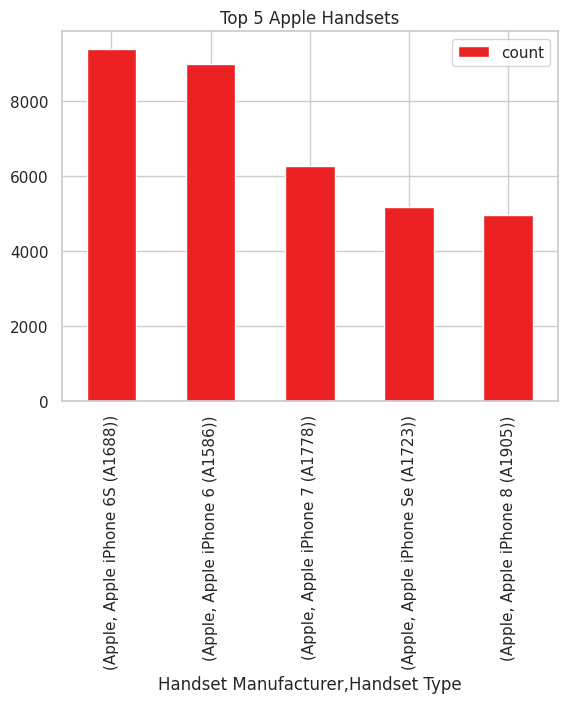

In [55]:
top_apple = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#ec2123')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4464
                     Samsung Galaxy A5 Sm-A520F     3700
                     Samsung Galaxy J5 (Sm-J530)    3675
                     Samsung Galaxy J3 (Sm-J330)    3456
                     Samsung Galaxy S7 (Sm-G930X)   3171

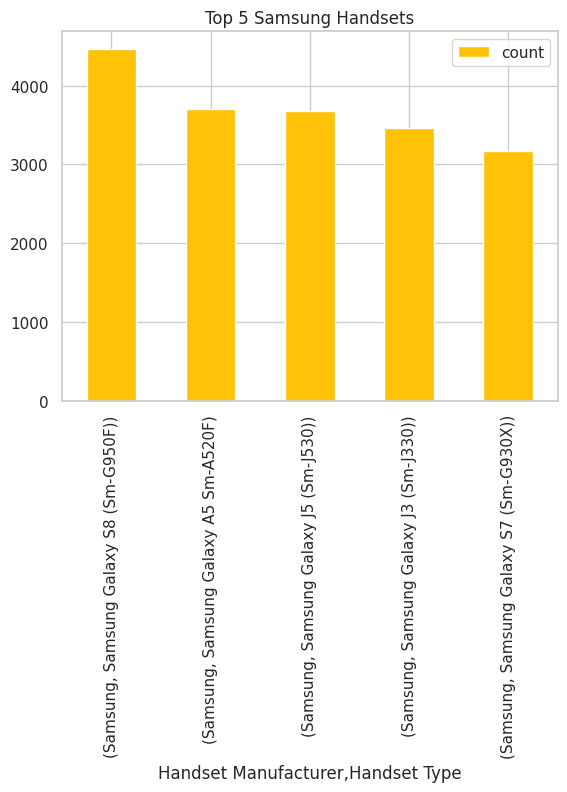

In [56]:
top_samsung = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#ffc206')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19727
                     Huawei E5180                     2074
                     Huawei P20 Lite Huawei Nova 3E   2012
                     Huawei P20                       1475
                     Huawei Y6 2018                    996

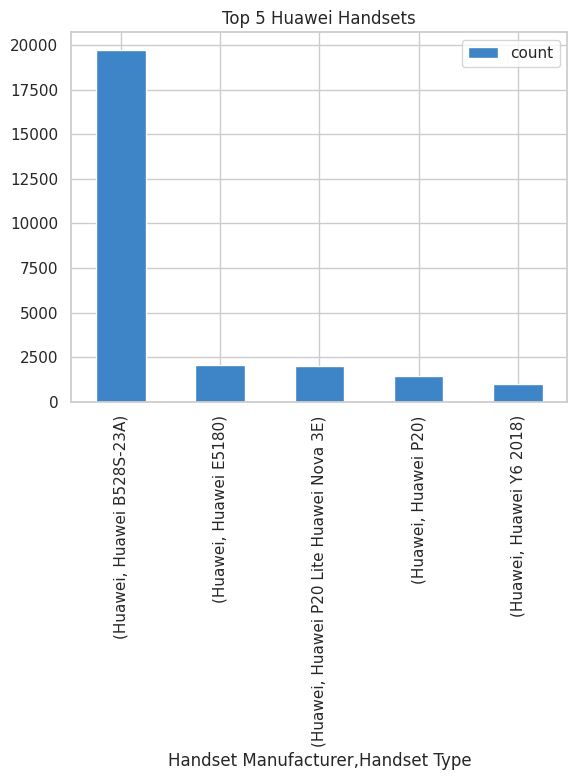

In [57]:
top_huawei = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#3d85c6')
top_huawei

The analysis's conclusion reveals:

• The Huawei B528S-23A is the most popular phone model among customers. It is produced by Huawei.

• The top three manufacturers of smartphones are: Apple with 59339, Samsung with 40429, and Huawei with 34296.

• Customers do not prefer Apple's handsets over Samsung's, and Samsung manufacturers the same as Apple does.

• It is advised that Huawei Handsets manufacturers expand their manufacturing capacity in order to better serve clients.






Task 2.1

number of xDR sessions


In [58]:
xDR_session_per_user = telecom_df.groupby('MSISDN/Number')['Bearer Id'].sum()
xDR_session_per_user

MSISDN/Number
3.360100e+10    1.311448e+19
3.360100e+10    7.349883e+18
3.360100e+10    7.349883e+18
3.360101e+10    1.304243e+19
3.360101e+10    1.462771e+19
                    ...     
3.379000e+10    1.304243e+19
3.379000e+10    1.311448e+19
3.197021e+12    7.277826e+18
3.370000e+14    7.349883e+18
8.823971e+14    7.277826e+18
Name: Bearer Id, Length: 106471, dtype: float64

Session duration

In [59]:
session_duration_per_user = telecom_df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
session_duration_per_user

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106471, dtype: float64

the total download (DL) and upload (UL) data


In [60]:
total_ul = telecom_df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()
total_dl = telecom_df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
print(f'total upload:\n{total_ul}\n\ntotal download:\n{total_dl}\n\ntotal upload + download: {total_dl+total_ul}')


total upload:
MSISDN/Number
3.360100e+10    36053108.0
3.360100e+10    36104459.0
3.360100e+10    39306820.0
3.360101e+10    20327526.0
3.360101e+10    94280527.0
                   ...    
3.379000e+10    26716429.0
3.379000e+10    35732243.0
3.197021e+12    37295915.0
3.370000e+14    56652839.0
8.823971e+14    60456049.0
Name: Total UL (Bytes), Length: 106471, dtype: float64

total download:
MSISDN/Number
3.360100e+10    8.426375e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    6.879252e+08
3.379000e+10    4.445751e+08
3.197021e+12    1.948281e+08
3.370000e+14    5.396350e+08
8.823971e+14    7.869760e+07
Name: Total DL (Bytes), Length: 106471, dtype: float64

total upload + download: MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3

the total data volume (in Bytes) during this session for each application


In [61]:
total_google = telecom_df['Google DL (Bytes)'] + telecom_df['Google UL (Bytes)']
total_email = telecom_df['Email DL (Bytes)'] + telecom_df['Email UL (Bytes)']
total_gaming = telecom_df['Gaming DL (Bytes)'] + telecom_df['Gaming UL (Bytes)']

total_youtube = telecom_df['Youtube DL (Bytes)'] + telecom_df['Youtube UL (Bytes)']
total_netflix = telecom_df['Netflix DL (Bytes)'] + telecom_df['Netflix UL (Bytes)']
total_social = telecom_df['Social Media DL (Bytes)'] + telecom_df['Social Media UL (Bytes)']
total_other = telecom_df['Other DL (Bytes)'] + telecom_df['Other UL (Bytes)']

# add the total data volumes on the main data set
telecom_df['total_google'] = total_google
telecom_df['total_email'] = total_email
telecom_df['total_gaming'] = total_gaming

telecom_df['total_youtube'] = total_youtube
telecom_df['total_netflix'] = total_netflix
telecom_df['total_social'] = total_social
telecom_df['total_other'] = total_other

# aggregate total data volume per application
# google
total_data_volume_per_user_google = telecom_df.groupby('MSISDN/Number')['total_google'].sum()
print(f'{total_data_volume_per_user_google}\n')

# email
total_data_volume_per_user_email = telecom_df.groupby('MSISDN/Number')['total_email'].sum()
print(f'{total_data_volume_per_user_email}\n')

# gaming
total_data_volume_per_user_gaming = telecom_df.groupby('MSISDN/Number')['total_gaming'].sum()
print(f'{total_data_volume_per_user_gaming}\n')

# youtube
total_data_volume_per_user_youtube = telecom_df.groupby('MSISDN/Number')['total_youtube'].sum()
print(f'{total_data_volume_per_user_youtube}\n')

# netflix
total_data_volume_per_user_netflix = telecom_df.groupby('MSISDN/Number')['total_netflix'].sum()
print(f'{total_data_volume_per_user_netflix}\n') 

# social
total_data_volume_per_user_social = telecom_df.groupby('MSISDN/Number')['total_social'].sum()
print(f'{total_data_volume_per_user_social}\n')

# other
total_data_volume_per_user_other = telecom_df.groupby('MSISDN/Number')['total_other'].sum()
print(f'{total_data_volume_per_user_other}\n')

MSISDN/Number
3.360100e+10     4389005.0
3.360100e+10     5334863.0
3.360100e+10     3443126.0
3.360101e+10     9678493.0
3.360101e+10    18499616.0
                   ...    
3.379000e+10     7531269.0
3.379000e+10     5429705.0
3.197021e+12    10438660.0
3.370000e+14     9830617.0
8.823971e+14     9218647.0
Name: total_google, Length: 106471, dtype: float64

MSISDN/Number
3.360100e+10    1331362.0
3.360100e+10    3307781.0
3.360100e+10    3205380.0
3.360101e+10    2284670.0
3.360101e+10    3305469.0
                  ...    
3.379000e+10    1006915.0
3.379000e+10    2514097.0
3.197021e+12    1520771.0
3.370000e+14    3318582.0
8.823971e+14    3330974.0
Name: total_email, Length: 106471, dtype: float64

MSISDN/Number
3.360100e+10    8.124587e+08
3.360100e+10    1.197501e+08
3.360100e+10    5.388277e+08
3.360101e+10    3.911261e+08
3.360101e+10    1.314798e+09
                    ...     
3.379000e+10    6.603614e+08
3.379000e+10    4.370033e+08
3.197021e+12    1.780487e+08
3.370000e+1

Task 2.2


Analyze the basic metrics (mean, median, etc) in the Dataset

In [62]:
relevant_features = ['Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_google', 'total_email', 'total_gaming', 'total_youtube', 'total_netflix', 'total_social', 'total_other']


print("Mean\n", telecom_df[relevant_features].mean(), '\n')
print("Median\n", telecom_df[relevant_features].median(), '\n')

mode_series = pd.Series(telecom_df[relevant_features].mode().values[0], index=relevant_features)
print("Mode\n", mode_series, '\n')

print("Highest\n", telecom_df[relevant_features].max(), '\n')
print("lowest\n", telecom_df[relevant_features].min(), '\n')


Mean
 Dur. (ms)                    1.050841e+05
Activity Duration DL (ms)    1.837842e+06
Activity Duration UL (ms)    1.414773e+06
Social Media DL (Bytes)      1.795144e+06
Social Media UL (Bytes)      3.292209e+04
Google DL (Bytes)            5.751770e+06
Google UL (Bytes)            2.056293e+06
Email DL (Bytes)             1.791785e+06
Email UL (Bytes)             4.674035e+05
Youtube DL (Bytes)           1.163387e+07
Youtube UL (Bytes)           1.100857e+07
Netflix DL (Bytes)           1.162724e+07
Netflix UL (Bytes)           1.100190e+07
Gaming DL (Bytes)            4.220642e+08
Gaming UL (Bytes)            8.289600e+06
Other DL (Bytes)             4.211525e+08
Other UL (Bytes)             8.262685e+06
Total UL (Bytes)             4.111937e+07
Total DL (Bytes)             4.546640e+08
total_google                 7.808063e+06
total_email                  2.259188e+06
total_gaming                 4.303538e+08
total_youtube                2.264244e+07
total_netflix               

Median
 Dur. (ms)                        86399.0
Activity Duration DL (ms)        39018.5
Activity Duration UL (ms)        46481.0
Social Media DL (Bytes)        1793860.5
Social Media UL (Bytes)          32917.0
Google DL (Bytes)              5767399.0
Google UL (Bytes)              2054221.5
Email DL (Bytes)               1793641.5
Email UL (Bytes)                466419.0
Youtube DL (Bytes)            11615961.5
Youtube UL (Bytes)            11012318.0
Netflix DL (Bytes)            11642380.0
Netflix UL (Bytes)            10999370.5
Gaming DL (Bytes)            423466906.5
Gaming UL (Bytes)              8291649.5
Other DL (Bytes)             421861759.0
Other UL (Bytes)               8266016.0
Total UL (Bytes)              41141959.5
Total DL (Bytes)             455940800.5
total_google                   7815669.0
total_email                    2264186.0
total_gaming                 431658476.5
total_youtube                 22661313.5
total_netflix                 22636325.0
total_so


Non-Graphical Univariate Analysis

In [64]:
sub_relevant_features = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)', 'total_google','total_email','total_gaming','total_youtube','total_netflix','total_social', 'total_other']

telecom_df[sub_relevant_features].describe()

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),total_google,total_email,total_gaming,total_youtube,total_netflix,total_social,total_other
count,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,4.190654e+10,1.050841e+05,4.111937e+07,4.546640e+08,7.808063e+06,2.259188e+06,4.303538e+08,2.264244e+07,2.262914e+07,1.828066e+06,4.294152e+08
std,2.450976e+12,8.107274e+04,1.127844e+07,2.441791e+08,3.516724e+06,1.071152e+06,2.440569e+08,9.247684e+06,9.260477e+06,1.035638e+06,2.432284e+08
min,3.360100e+10,7.142000e+03,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03,1.490450e+05
25%,3.365131e+10,5.824875e+04,3.321828e+07,2.431263e+08,4.944994e+06,1.359336e+06,2.187362e+08,1.599374e+07,1.598016e+07,9.321828e+05,2.186682e+08
50%,3.366371e+10,8.639900e+04,4.114196e+07,4.559408e+08,7.815669e+06,2.264186e+06,4.316585e+08,2.266131e+07,2.263632e+07,1.825931e+06,4.300438e+08
75%,3.368352e+10,1.329328e+05,4.903252e+07,6.657542e+08,1.068307e+07,3.160024e+06,6.415282e+08,2.929824e+07,2.928832e+07,2.727493e+06,6.398960e+08
max,8.823971e+14,1.859336e+06,7.833131e+07,9.029696e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06,8.595209e+08


insight

• Users upload less content than they download

• A greater number of users submit data than download data

• Gamers spend more money on games than on other channels like social media.


Graphical Univariate Analysis